## Kwant study

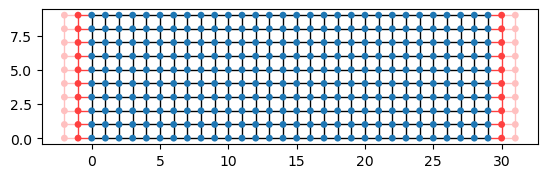

In [7]:
import kwant
from matplotlib import pyplot

syst = kwant.Builder()
a = 1
lat = kwant.lattice.square(a, norbs=1)

t = 1.0
W, L = 10, 30
# Define the scattering region
for i in range(L):
    for j in range(W):
        # On-site Hamiltonian
        syst[lat(i, j)] = 4 * t
        # Hopping in y-direction
        if j > 0:
            syst[lat(i, j), lat(i, j - 1)] = -t
        # Hopping in x-direction
        if i > 0:
            syst[lat(i, j), lat(i - 1, j)] = -t
            
# Then, define and attach the leads:

# First the lead to the left

# (Note: TranslationalSymmetry takes a real-space vector)
sym_left_lead = kwant.TranslationalSymmetry((-a, 0))
left_lead = kwant.Builder(sym_left_lead)

for j in range(W):
    left_lead[lat(0, j)] = 4 * t
    if j > 0:
        left_lead[lat(0, j), lat(0, j - 1)] = -t
    left_lead[lat(1, j), lat(0, j)] = -t
    
syst.attach_lead(left_lead)

# Then the lead to the right

sym_right_lead = kwant.TranslationalSymmetry((a, 0))
right_lead = kwant.Builder(sym_right_lead)

for j in range(W):
    right_lead[lat(0, j)] = 4 * t
    if j > 0:
        right_lead[lat(0, j), lat(0, j - 1)] = -t
    right_lead[lat(1, j), lat(0, j)] = -t

syst.attach_lead(right_lead)
kwant.plot(syst);

# Finalize the system
syst = syst.finalized()

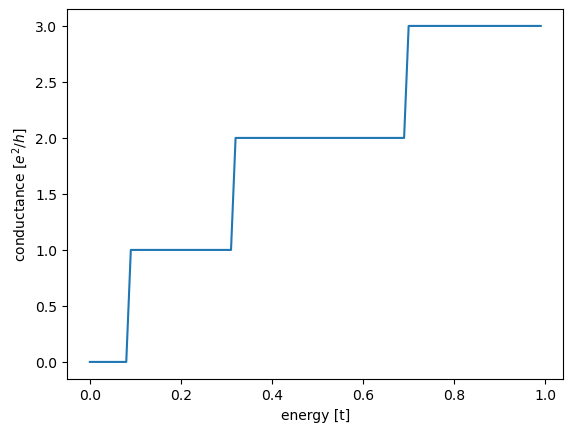

In [8]:
# Now that we have the system, we can compute conductance
energies = []
data = []
for ie in range(100):
    energy = ie * 0.01

    # compute the scattering matrix at a given energy
    smatrix = kwant.smatrix(syst, energy)

    # compute the transmission probability from lead 0 to
    # lead 1
    energies.append(energy)
    data.append(smatrix.transmission(1, 0))

# Use matplotlib to write output
# We should see conductance steps
pyplot.figure()
pyplot.plot(energies, data)
pyplot.xlabel("energy [t]")
pyplot.ylabel("conductance [$e^2/h$]")
pyplot.show()